<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe8_Optimal_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del Problema

Para introducir sobre el árbol binario de búsqueda óptimo, primero hay que definir lo que es un árbol binario, que no es más que una estructura de datos cuyos nodos pueden tener un hijo a la izquierda o a la derecha (no más de 2). Por lo tanto un árbol binario de búsqueda no es más que un tipo de árbol binario cuya estructura de árbol se representa en informática.

Para el problema de árbol binario de búsqueda óptimo, cada nodo tiene un valor con cierta frecuencia de ser buscado, por lo que nos piden es ordenar el árbol de tal forma que los nodos que tengan una mayor probabilidad de ser encontrados se encuentren más cerca de la raiz, mientras que los menos probables estén más alejados, ya que de esta manera nos aseguramos de minimizar la cantidad de nodos a recorrer en una busqueda promedio.

**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias $d_i$** que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.



# 2. Árbol binario de búsqueda óptimo

## 2.1 Descripción del Algoritmo

El algoritmo **árbol binario de búsqueda óptimo**, se basa básicamente en minimizar la cantidad de nodos a recorrer en la búsqueda de algun nodo en específico, y asi asegurar un tiempo de ejecución menor a si se buscara en un árbol binario común. 

En la siguiente imagen podemos ver un ejemplo de un caso de árbol binario de búsqueda:


<a href="https://imgur.com/PDpoo30"><img src="https://imgur.com/PDpoo30.png" title="source: imgur.com" /></a>

Como vemos, tenemos nuestros nodos con sus respectivas frecuencias de ocurrencia, pero ¿Como sabemos con cual forma debemos elegir para asegurar la menor cantidad de nodos a recorrer?, aqui es donde entra el término de coste. Cada árbol binario tiene un respectivo coste, el cual se calcula multiplicando la frecuencia del nodo por el nivel en el cual se encuentra y donde dicho coste corresponde al promedio de nodos que se debe visitar en una búsqueda. Por ejemplo para calcular el coste del primer árbol binario de la imagen debemos hacer lo siguiente:

* Primero tenemos el nodo 1, el cual tiene una frecuencia de 0.4 y se encuentra en el primer nivel.
* El segundo nodo 2, que tiene una frecuencia de 0.1 y se encuentra en el segundo nivel. 
* Finalmente el nodo 3 con una frecuencia del 0.5 que está en el tercer nivel. 

Por lo que para calcular hacemos lo siguiente: coste = $(0.4 * 1) + (0.1 * 2) + (0.5 * 3)$ que nos da un coste promedio de $2.1$.

Luego de hacer esto con cada árbol y sus combinaciones, el árbol binario de búsqueda óptimo para este caso es el último, ya que su coste promedio es de $1.6$

Este procedimiento es lo que 



Este algoritmo puede implementarse de las siguientes maneras:

* *Método Recursivo*

* *Método Programación Dinámica*


##2.2 Código Método Recursivo

###A continuación se mostrará la implementación del algoritmo Arbol binario de búsqueda en la forma recursiva:


In [ ]:
import random
import numpy as np
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

contadorRecursivo = 0
def optCost(freq, i, j):
    global contadorRecursivo
    contadorRecursivo +=1
    # Casos base
    if j < i:     # subarreglo sin elementos
        return 0
    if j == i:     # subarreglo con 1 elemento
        return freq[i]
    fsum = Sum(freq, i, j)
    Min = 999999999999
    for r in range(i, j + 1):
        # llama recursivamente a la función pero desde el inicio -> r-1
        # más la llamada desde r+1 -> final
        cost = (optCost(freq, i, r - 1) + optCost(freq, r + 1, j))
        if cost < Min:
            Min = cost
    return Min + fsum

def optimal_bst_recursive(keys, freq, n, visualize, verbose):
    if(visualize == True):
      T = nx.DiGraph()
      generate_binary_tree(T,keys) 
      pos = graphviz_layout(T, prog="dot")
      nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")
    return optCost(freq, 0, n - 1)
 
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

# FUNCION GENERADOR DE INSTANCIA
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    p = list(arr[:n]) # Probabilidad de las claves
    return keys, p

# FUNCION GENERADOR DE ARBOL BINARIO
nullnodes=0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = random.randint(0,len(A)-1)
      T.add_node(A[pivote])
      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote == 0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      return A[pivote]

# Ejemplo
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)

cost = optimal_bst_recursive(keys, freq, n, False, False)

print("Las claves del árbol son:",keys)
print("y sus respectivas frecuencias:", freq)
print("\nEl costo del árbol binario de búsqueda óptimo es:", cost, "con",contadorRecursivo,"llamadas recursivas")

Las claves del árbol son: [10, 12, 20]
y sus respectivas frecuencias: [34, 8, 50]

El costo del árbol binario de búsqueda óptimo es: 142 con 15 llamadas recursivas


Este método consiste en probar recursivamente todas las posibles combinaciones de los nodos y sus posiciones, calcula los mismos subproblemas una y otra vez, para así en cada iteración ver si el coste es menor.

Definimos un arreglo con frecuencias que va desde $i$ -> $j$

Para hacerlo, primero se definen los casos bases que son:

1.  si $j < i$: cuando el arreglo no tiene elementos retorna 0.

2.  si $j=i$: cuando el arreglo tiene un solo elemento, retorna la frecuencia de dicho elemento.

Luego, mediante un ciclo for recorre todo el arreglo de frecuencias, eligiendo en cada iteración el nodo como raiz $k_r$,(en un arreglo que va desde $k_i$ hasta $k_j$)  y llamando a la función nuevamente de manera recursiva, pero esta vez desde $k_i$ -> $k_{r-1}$ y $k_{r+1}$ -> $k_j$

y en cada una de éstas guardamos el coste mínimo, para finalmente retornar el mínimo del algoritmo.

El problema de este método es el hecho de que se calculan muchas veces lo mismo, como veremos en el siguiente ejemplo: 

<a href="https://imgur.com/I9oLfRM"><img src="https://imgur.com/I9oLfRM.png" title="source: imgur.com" /></a>

Tenemos una lista con cuatro nodos, y el algoritmo divide en subproblemas a resolver como mencionamos anteriormente, pero podemos ver que el subproblema que toma los valores desde $2-3$ o $1-2$ se calculan en diferentes momentos, lo cual no lo hace muy eficiente en temas de tiempo. 

## 2.3 Método Programación dinámica

###A continuación se mostrará la implementación del algoritmo árbol binario de busqueda óptimo aplicando la programación dinámica:

In [ ]:
def optimal_bst_dinamic(keys, freq, n, visualize,verbose):
    contadorDinamica = 0
    INT_MAX = 2147483647
    # Matriz auxiliar para guardar costos
    cost = [[0 for x in range(n)]
               for y in range(n)]
    root = [[0 for x in range(n)]
               for y in range(n)]

    for i in range(n):
        cost[i][i] = freq[i]
    if(verbose == True): 
      print("la matriz inicial con sus frecuencias:")
      for i in cost:
        print(i)
      print("\n")
        
    for L in range(2, n + 1):
        for i in range(n - L + 2):
            j = i + L - 1
            if i >= n or j >= n:
                break
            off_set_sum = Sum(freq, i, j)
            cost[i][j] = INT_MAX
            for r in range(i, j + 1):
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += off_set_sum
                if (c < cost[i][j]):
                    cost[i][j] = c
                    root[i][j] = r

                contadorDinamica+=1

            if(verbose == True): 
              print("la matriz hasta el momento:")
              for i in cost:
                print(i)
              print("\n")

    if(verbose == True):
      print("SubEstructura óptima:")
      for i in root: print(i)
            
    return cost[0][n - 1],root,contadorDinamica

# Ejemplo
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
cost,root,cont = optimal_bst_dinamic(keys, freq, n, False, False)

print("Las claves del árbol son:",keys)
print("y sus respectivas frecuencias:", freq, end="\n\n")
print("\nEl costo del árbol binario de búsqueda óptimo es:", cost,"con", cont ,"subProblemas a resolver")

Las claves del árbol son: [10, 12, 20]
y sus respectivas frecuencias: [34, 8, 50]


El costo del árbol binario de búsqueda óptimo es: 142 con 7 subProblemas a resolver


Este método resuelve el problema de eficiencia del método anterior, puesto que la gracia es al momento de resolver un subProblema por primera vez, guarda dicho valor dentro de una matriz auxiliar, a la cual se volverá a acceder siempre que nos encontremos con algun subProblema que ya se resolvio anteriormente, en temas de complejidad espacial se gasta más debido a las diferentes matrices que se implementan, pero por lo mismo se resuelve el problema de tiempo en los casos ya resueltos.

##2.4. Ejecución del algoritmo recurisvo paso a paso con verbose = True 

In [ ]:
keys = [10, 12, 20, 50]
freq = [24, 8, 15, 52]
n = len(keys)
print("Las claves del árbol son:",keys)
print("y sus respectivas frecuencias:", freq)
cost,root,cont = optimal_bst_dinamic(keys, freq, n, False, True)
print("\nEl costo del árbol binario de búsqueda óptimo es:", cost, "con", cont,"subProblemas a resolver")


Las claves del árbol son: [10, 12, 20, 50]
y sus respectivas frecuencias: [24, 8, 15, 52]
la matriz inicial con sus frecuencias:
[24, 0, 0, 0]
[0, 8, 0, 0]
[0, 0, 15, 0]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 0, 0]
[0, 8, 0, 0]
[0, 0, 15, 0]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 0, 0]
[0, 8, 31, 0]
[0, 0, 15, 0]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 0, 0]
[0, 8, 31, 0]
[0, 0, 15, 82]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 78, 0]
[0, 8, 31, 0]
[0, 0, 15, 82]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 78, 0]
[0, 8, 31, 106]
[0, 0, 15, 82]
[0, 0, 0, 52]


la matriz hasta el momento:
[24, 40, 78, 177]
[0, 8, 31, 106]
[0, 0, 15, 82]
[0, 0, 0, 52]


SubEstructura óptima:
[0, 0, 0, 3]
[0, 0, 2, 3]
[0, 0, 0, 3]
[0, 0, 0, 0]

El costo del árbol binario de búsqueda óptimo es: 177 con 16 llamadas recursivas


##2.4. Ejecución del algoritmo recursivo con visualize = True

Las claves del árbol son: [10, 12, 20]
y sus respectivas frecuencias: [34, 8, 50]

El costo del árbol binario de búsqueda óptimo es: 142 con 15 llamadas recursivas


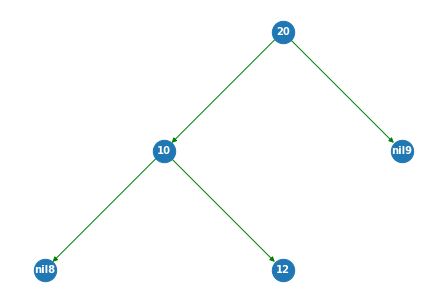

In [ ]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
contadorRecursivo = 0
cost = optimal_bst_recursive(keys, freq, n, True, False)
print("Las claves del árbol son:",keys)
print("y sus respectivas frecuencias:",freq)
print("\nEl costo del árbol binario de búsqueda óptimo es:", cost, "con",contadorRecursivo,"llamadas recursivas")

# 3. Correctitud 

### **Teorema (Correctitud Método bottom-up).**

El algoritmo retorna el árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).

## Prueba del Teorema

Para demostrar esto, primero debemos explicar cual es la subestructura óptima de este problema y aplicar el método de programación avanzada.

Cualquier subárbol en OBST contiene claves en orden $k_i$ -> $k_j$ , donde $1 ≤ i ≤ j ≤ n$.

El subárbol que contiene claves $k_i$ -> $k_j$ tiene hojas con claves ficticias $d_{i-1}$ -> $d_j$. Como veremos en la siguiente imagen:

<a href="https://imgur.com/dMzpVk6"><img src="https://imgur.com/dMzpVk6.png" title="source: imgur.com" /></a>

Cada subproblema consiste en seleccionar una clave $k_i$ como nodo raíz, y obtener el coste mínimo basándose en el coste mínimo de los subproblemas que se forman, partiendo desde $k_1$ y resolviendo desde $k_2$ hasta $k_n$, hasta finalmente escoger $k_n$ y resolver desde $k_1$ hasta $k_{n-1}$

llevando esto a un caso general, el coste del subárbol con raíz $k_x$ será igual al coste mínimo de los subárboles más la probabilidad de visitar el nodo con clave $k_x$.

La probabilidad de visitar un nodo es igual a la probabilidad de buscar su clave más la probabilidad de buscar la clave de alguno de sus hijos. Es decir, $\sum\limits_{k=i}^j p_j$.

Por lo tanto, el coste del árbol con raíz $k_x$ es la suma del coste de la busqueda de alguno de sus hijos más el coste de busqueda del propio elemento:

$c_{i,j}(x)=c_{i,x-1} + c_{x+1,j} + \sum\limits_{k=1}^j p_j$ ; siendo $i$ el elemento inicial y $j$ el elemento final.


# 4. Tiempo de ejecución


### **Teorema (Tiempo de ejecución Método Bottom-up).**

*El algoritmo requiere un tiempo $O(n^3)$*

## Prueba del teorema

Para comprobar esto debemos analizar lo que realiza el algoritmo junto con la cantidad de subProblemas que este resuelve, donde se utilizan tres bucles for anidados y cada uno de estos bucles toma como máximo n valores.

A continuación podemos ver el pseudocodigo de lo anterior:

<a href="https://imgur.com/SFaYc8G"><img src="https://imgur.com/SFaYc8G.png" title="source: imgur.com" /></a>

$T(n)=\sum\limits_{l=1}^{n} \sum\limits_{i=1}^{n-l+1} \sum\limits_{j=i}^{n-1+1} O(1)$

(Dentro de cada bucle tenemos operaciones con complejidad $O(1)$)

Y desarrollando la misma fórmula matemática, podemos llegar a:

$T(n)=\sum\limits_{l=1}^{n} \sum\limits_{i=1}^{n-l+1} n$

$T(n)=\sum\limits_{l=1}^{n} n^2$

$T(n) = n^3$







# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación de tiempo de ejecución entre:

* Árbol binario de búsqueda óptimo Recursivo

* Árbol binario de búsqueda óptimo con Programación Dinámica


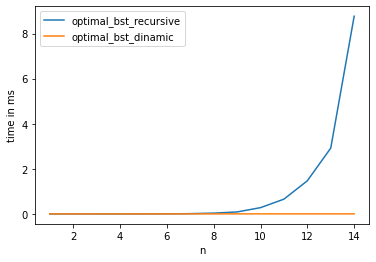

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]
verbose = False
for n in range(1,15):
  keys,freq = optimal_bst_instance_generator(n)

  t1 = repeat(setup="from __main__ import optimal_bst_recursive", stmt=f"optimal_bst_recursive({keys}, {freq}, {len(keys)}, {False}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import optimal_bst_dinamic", stmt=f"optimal_bst_dinamic({keys}, {freq}, {len(keys)}, {False}, {False})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["optimal_bst_recursive","optimal_bst_dinamic"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Luego de ver el gráfico, podemos comprobar como es más eficiente el metodo bottom-up y lo importante que es almacenar los resultados para asi no tener que volver a calcular los valores nuevamente y como esta misma crece de forma exponencial.